## Implementando Problemas de OR - Parte I

**Autor:** Guilherme Cadori

**Data:** 26/03/2024


#### Problema 1)
Uma empresa de comida canina produz dois tipos de rações: Tobi e Rex. Para a manufatura das rações são utilizadas cereais e carne. Sabe-se que:

* A ração Tobi utiliza 5kg de cerais e 1kg de carne, e a ração rex utiliza 4kg de carne e 2kg de cereais;
* O pacote de ração Tobi custa 20 Reais e o pacote de ração Rex custa 30 Reais;
* O kg de carne custa 4 Reais e o kg de cereais custa 1 Real;
* Estão disponíveis por mês 10.000kg de carne e 30.000kg de cereais.

Deseja-se saber a quantidade de cada ração a produzir de modo a maximizar o lucro.


#### Processo de Modelagem
##### 1) Variáveis de Decisão:

*Generalizado:*
Variável de Decisão:
* $x_i$: Quantidade unitária da ração ***i*** a ser produzida em um dado mês

Índices
* $i$: Ração do tipo *i*
* $j$: Recurso *j* consumido para produzir a ração do tipo *i*

Extensão dos Conjuntos dos Índices
* $n$: Tipos diferentes de rações consideradas
* $m$: Quantidade de recursos necessários para produzir as rações consideradas


*Aplicado ao Problema:*
* $x_1$: Quantidade unitária da ração da ração ***Tobi*** a ser produzida em um dado mês 
* $x_2$: Quantidade unitária da ração da ração ***Rex*** a ser produzida em um dado mês


#### 2) Parâmetros
***Consumo de Recursos***

*Generalizado*
* $CONSUMO_{ij}$: consumo em kg do recurso *j* para a produção de uma unidade de ração *i*

*Aplicado ao Problema*
* $CONSUMO_{11}$: ração *1* consome 5 kg de cereais para cada unidade produzida da ração
* $CONSUMO_{12}$: ração *1* consome 1 kg de carne para cada unidade produzida da ração
* $CONSUMO_{21}$: ração *2* consome 2 kg de cereais para cada unidade produzida da ração
* $CONSUMO_{22}$: ração *2* consome 4 kg de carne para cada unidade produzida da ração


***Preços***
*Generalizado*
* $PREÇO_i$: preço de venda da ração $i$

*Aplicado ao Problema*
* $PREÇO_1$: preço de venda da ração *1*, R\$ 20,00/un
* $PREÇO_2$: preço de venda da ração *2*, R\$ 30,00/un


***Custos***
*Generalizado*
* $CUSTO_{ij}$: custo do recurso *j* consumido para produzir uma unidade da ração do tipo *i*

*Aplicado ao Problema*
* $CUSTO_{,1}$: custo de carne, R\$ 4,00/kg
* $CUSTO_{,2}$: custo de cereais, R\$ 1,00/kg

***Disponibilidade de Recursos***
*Generalizado*
* $DISPONIBILIDADE_j$: disponibilidade mensal do recurso *j* em kg/mês


*Aplicado ao Problema*
* $DISPONIBILIDADE_1$: disponibilidade mensal de carne, 10.000 kg/mês
* $DISPONIBILIDADE_2$: disponibildiade mensal de cereais, 30.000 kg/mês


****IMPORTANTE:*** Daqui em diante a modelagem será apresentada na forma *generalizada* devido à extensão dos problemas.


#### 3) Função Objetivo

***Objetivo:*** Maximizar o lucro por mês

*Função Objetivo - Generalizada:*

$$ max \, Z = \sum_{i = 1} ^{n} \sum_{j = 1} ^{m} (PREÇO_i - CUSTO_{ij} CONSUMO_{ij}) x_i $$


#### 4) Restrições
***Restrições Generalizadas***

1) Restrição de disponibilidade do recurso *j* por mês

\begin{gathered}
\begin{aligned}
&\sum_{i=1}^{n}\sum_{j=1}^{m} CONSUMO_{ij} x_i \leq DISPONIBILIDADE_j &
\end{aligned}
\end{gathered}

2) Restrição de não-negatividade

\begin{aligned}
&\ x_i \geq 0
\end{aligned}


#### 5) Formulação Matemática Formal

$\displaystyle max \, Z = \sum_{i = 1} ^{n} \sum_{j = 1} ^{m} (PREÇO_i - CUSTO_{ij} CONSUMO_{ij}) x_i $


$\displaystyle s.t. $

$\displaystyle\sum_{i=1}^{n}\sum_{j=1}^{m} CONSUMO_{ij} x_i \leq DISPONIBILIDADE_j $ $\,\,\,$ $\forall$ *i* $=1,...,n,$ $\,$ $\forall$ *j* $=1,...,m $

$\displaystyle\ x_i \geq 0$ $\,\,\,$ $\forall$ *i* $=1,...,n$

#### 6) Implementação Generalizada - gurobipy



In [1]:
# Importando gurobipy API
import gurobipy as gp

# Criando dados de recursos e parâmetros associados
recurso, disponibilidade, custo = gp.multidict({
    "carne": [10000, 4],
    "cereais": [30000, 1] })

# Criando dados de lucro por tipo ração
tipoRacao, lucro = gp.multidict({
    "TipoTobi": 11,
    "TipoRex": 12 })

# Criando relação de recursos demandados por tipo de ração
consumoRecursos = {
    ("carne", "TipoTobi"): 1,
    ("carne", "TipoRex"): 4,
    ("cereais", "TipoTobi"): 5,
    ("cereais", "TipoRex"):  2}

# Criando o modelo
m = gp.Model("Max Lucro Ração")

# Criando variáveis de decisão
Qt_tipoRacao = m.addVars(tipoRacao, name = "Tipo de Ração")


Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27


In [2]:
# Criando restrições de disponibilidade
restrDisponib = m.addConstrs(((sum(consumoRecursos[j, i] * Qt_tipoRacao[i] for i in tipoRacao) 
                     <= disponibilidade[j]) for j in recurso), name = 'Restrição de Disponibilidade de Recursos')


In [3]:
# Criando função objetivo
m.setObjective(Qt_tipoRacao.prod(lucro), gp.GRB.MAXIMIZE)

# Otimizando o modelo
m.optimize()


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x9ff22945
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+01, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 3e+04]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3000000e+31   2.125000e+30   2.300000e+01      0s
       2    7.4444444e+04   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  7.444444444e+04


#### 7) Plano de Produção

In [4]:
# Valores das variáveis de decisão
x1 = m.x[0]
x2 = m.x[1]

x1 = round(x1, 0)
x2 = round(x2, 0)

print("Plano de Produção:\n")
print("Tipo de ração ser produzida e quantidade (un):")
print("Ração ", tipoRacao, ": ", x1, "; ", x2, sep = "")

# Valor da Função Objetivo
print("\nLucro Total: R$", round(m.objVal, 2))

Plano de Produção:

Tipo de ração ser produzida e quantidade (un):
Ração ['TipoTobi', 'TipoRex']: 5556.0; 1111.0

Lucro Total: R$ 74444.44


#### 8) Representação Gráfica

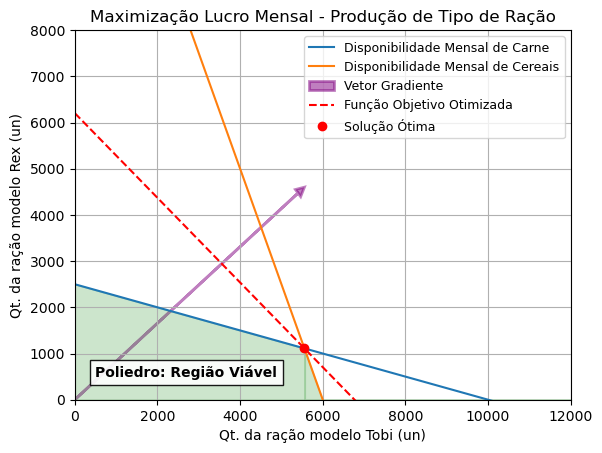

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo restrições
x = np.linspace(0, 12000, 500)
y1 = (10000-x)/4.0
y2 = (30000-5*x)/2.0

# Plotando restriçõies
plt.plot(x, y1, label='Disponibilidade Mensal de Carne')
plt.plot(x, y2, label='Disponibilidade Mensal de Cereais')

## Plotando o vetor gradiente
ax1 = 5555.55
ax2 = 4600

plt.arrow(0, 0, ax1, ax2, 
          length_includes_head=True, 
          head_width=200, 
          head_length=200, 
          color='purple', 
          label='Vetor Gradiente',
          alpha=0.5,
          linewidth=2)

# Plotando função objetivo otimizada
y5 = (74444 - 11*x)/12.0
plt.plot(x, y5, label='Função Objetivo Otimizada', color='red', linestyle='--')

# Plotando a solução ótima
plt.plot(5556, 1111, 'ro', label='Solução Ótima')

# Plotando a reigão viável
y3 = np.maximum(0, y1)
y4 = np.minimum(y2, y3)
y5 = np.maximum(0, y2)
plt.fill_between(x, y2, where=(y2<=y1), color='green', alpha=0.2)
plt.fill_between(x, y3, where=(y1<=y2), color='green', alpha=0.2)
plt.text(500, 500, 
         'Poliedro: Região Viável', 
         fontsize=10, 
         fontweight='bold',
         bbox=dict(facecolor='white', alpha=0.9))

# Deifinindo os limites dos eixos x1 e x2
plt.xlim(0, 12000)
plt.ylim(0, 8000)

# Adicionando linha de grid e posição da legenda
plt.grid(True)
plt.legend(loc='upper right', fontsize=9)

# Criando títulos do eixos e do gráfico
plt.xlabel('Qt. da ração modelo Tobi (un)')
plt.ylabel('Qt. da ração modelo Rex (un)')
plt.title('Maximização Lucro Mensal - Produção de Tipo de Ração')

# Aprensetando a visualização do gráfico
plt.show()


***
**Fim**
***